# Vehicle Price Predictions using Supervised Learning

This project explores different ways to predict vehicular prices using Supervised Learning on the kaggle Automotive Price Prediction Dataset, found at this URL: https://www.kaggle.com/datasets/metawave/vehicle-price-prediction

Note that for this project, since the dataset was relatively small, I chose to download the .csv file directly to my machine. I've prevented it from uploading to git using .gitignore. If you would like to replicate this code, you will need to download the csv from the abovementioned kaggle link. 

This is my final project for Introduction to Machine Learning: Supervised Learning, taught at CU Boulder. It requires 3 deliverables:

1. this notebook
2. a video presentation (powerpoint slides will be available on Git)
3. a public GitHub repository, found here: https://github.com/Kate-Zilla/Vehicle-Price-Predictions-Using-Supervised-Learning 

First I'll start with import statements.

In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os
from sklearn.model_selection import train_test_split

#EDA Section
Here I load & inspect the data


In [2]:

df = pd.read_csv('vehicle_price_prediction.csv')
df.head()

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   make              1000000 non-null  object 
 1   model             1000000 non-null  object 
 2   year              1000000 non-null  int64  
 3   mileage           1000000 non-null  int64  
 4   engine_hp         1000000 non-null  int64  
 5   transmission      1000000 non-null  object 
 6   fuel_type         1000000 non-null  object 
 7   drivetrain        1000000 non-null  object 
 8   body_type         1000000 non-null  object 
 9   exterior_color    1000000 non-null  object 
 10  interior_color    1000000 non-null  object 
 11  owner_count       1000000 non-null  int64  
 12  accident_history  249867 non-null   object 
 13  seller_type       1000000 non-null  object 
 14  condition         1000000 non-null  object 
 15  trim              1000000 non-null  object 
 16  v

so we have 20 columns (including price), that contain either object, int, or float data types. note that there is not an ID column. There are 1000000 entries, 0 to 999999

Below I will display the unique values that exist in each column with dtype = object

In [4]:
for c in df.columns:
    if df[c].dtype == 'object':
        print(c, df[c].unique())

make ['Volkswagen' 'Lexus' 'Subaru' 'Cadillac' 'Toyota' 'Land Rover' 'Mazda'
 'Ram' 'Chrysler' 'GMC' 'Volvo' 'Audi' 'Chevrolet' 'Tesla' 'Hyundai'
 'Ford' 'Porsche' 'Acura' 'Nissan' 'Kia' 'Jeep' 'BMW' 'Dodge'
 'Mercedes-Benz' 'Honda']
model ['Jetta' 'RX' 'Crosstrek' 'Lyriq' 'Highlander' 'Defender' 'Mazda3' 'Atlas'
 '2500' '300' 'Yukon' 'XT5' 'Range Rover' 'S60' 'Camry' 'Q5' 'Silverado'
 'Model 3' '3500' 'Sonata' 'Camaro' 'Explorer' '911' 'MDX' 'Sentra'
 'Mustang' 'Discovery' 'R8' 'Forte' 'Equinox' 'Model Y' '1500'
 'Grand Cherokee' 'Mazda6' 'M3' 'Malibu' 'Pacifica' 'Panamera'
 'Pathfinder' 'V60' 'A6' 'Sorento' 'Cherokee' 'IS' 'Macan' 'Tiguan'
 'Tucson' '3 Series' 'Durango' 'Titan' 'TLX' 'S-Class' 'E-Class' 'RDX'
 'Corolla' 'RAV4' 'F-150' 'X5' 'Outback' 'Cayenne' 'Rogue' 'Accord'
 'Acadia' 'ES' 'Sportage' 'Tacoma' 'CT5' 'Challenger' 'Sierra' 'Wrangler'
 'Altima' 'Model S' 'GLE' 'NX' 'Tahoe' 'Q7' 'Integra' 'Impreza' 'Terrain'
 'Civic' 'XC60' 'X3' 'Golf' 'Escape' 'XC90' 'Santa Fe' 'CX-9' '

consider dropping the "make" column, as we already have the model, which can be mapped back to make, also drop year, as we have vehicle age, and drop mileage/year as we have mileage and vehicle age. 

In [5]:
df=df.drop(['make','year','mileage_per_year'], axis=1)

I chose to fill in the n/a in accident history with "No" to avoid NaN in my data, but still use this column as I feel like the presence or absence of accidents might affect value

In [ ]:
df['accident_history'] = df['accident_history'].fillna("No")


,model,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,brand_popularity,price
0,Jetta,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,No,Dealer,Excellent,EX,9,0.040054,7208.52
1,RX,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,0.039921,6911.81
2,Crosstrek,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,No,Dealer,Excellent,Touring,9,0.040230,11915.63
3,Lyriq,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,No,Private,Good,Base,9,0.039847,25984.79
4,Highlander,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,0.039627,8151.30


In [7]:
df.head()

,model,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,brand_popularity,price
0,Jetta,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,No,Dealer,Excellent,EX,9,0.040054,7208.52
1,RX,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,0.039921,6911.81
2,Crosstrek,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,No,Dealer,Excellent,Touring,9,0.040230,11915.63
3,Lyriq,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,No,Private,Good,Base,9,0.039847,25984.79
4,Highlander,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,0.039627,8151.30


Since pandas correlation matrix only uses numeric dtypes and assumes continuous relationships, it would not be appropriate to apply it to this discrete dataset. 
for the sake of this assignment, i am going to create it anyway, but know it is not actually going to be a strong indicator.

In [8]:
df.corr(numeric_only=True)

,mileage,engine_hp,owner_count,vehicle_age,brand_popularity,price
mileage,1.000000,0.000011,0.513928,0.783262,-0.000868,-0.618349
engine_hp,0.000011,1.000000,0.000411,-0.000143,0.077402,0.653339
owner_count,0.513928,0.000411,1.000000,0.646077,-0.000830,-0.449437
vehicle_age,0.783262,-0.000143,0.646077,1.000000,0.000234,-0.662811
brand_popularity,-0.000868,0.077402,-0.000830,0.000234,1.000000,0.055940
price,-0.618349,0.653339,-0.449437,-0.662811,0.055940,1.000000


this way i can go ahead and make a heat map like we did in the week 1 lab

<Axes: >

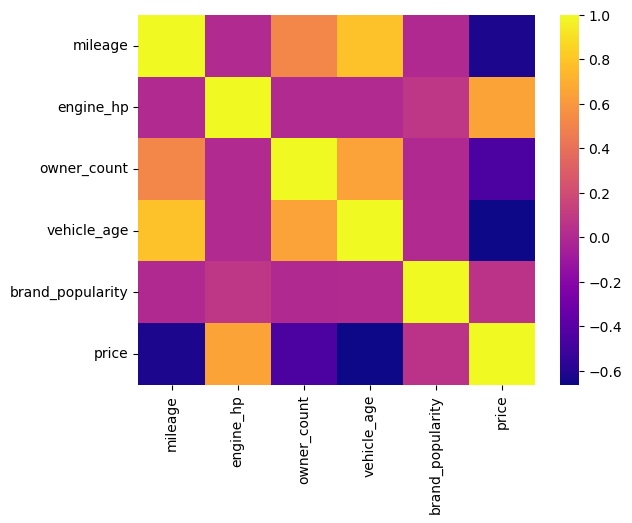

In [9]:
sns.heatmap(df.corr(numeric_only=True),cmap="plasma")

from the above, owner count, mileage, and vehicle age could have some strong correlation. I think I'll drop owner_count but keep vehicle age and mileage as a "young" vehicle could be driven many miles and an older vehicle could be kept parked in a garage. 

Also note, that of the numeric only categories, horsepower appears the strongest indicator of value. this may change once categorical data is evaluated, however. 

In [10]:
df = df.drop(['owner_count'], axis=1)
df.head()

,model,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,accident_history,seller_type,condition,trim,vehicle_age,brand_popularity,price
0,Jetta,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,No,Dealer,Excellent,EX,9,0.040054,7208.52
1,RX,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,Minor,Dealer,Good,LX,15,0.039921,6911.81
2,Crosstrek,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,No,Dealer,Excellent,Touring,9,0.040230,11915.63
3,Lyriq,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,No,Private,Good,Base,9,0.039847,25984.79
4,Highlander,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,Minor,Dealer,Excellent,Sport,7,0.039627,8151.30


I will also drop brand popularity as that directly relates to make/model

In [11]:
df = df.drop(['brand_popularity'], axis=1)
df.head()

,model,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,accident_history,seller_type,condition,trim,vehicle_age,price
0,Jetta,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,No,Dealer,Excellent,EX,9,7208.52
1,RX,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,Minor,Dealer,Good,LX,15,6911.81
2,Crosstrek,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,No,Dealer,Excellent,Touring,9,11915.63
3,Lyriq,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,No,Private,Good,Base,9,25984.79
4,Highlander,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,Minor,Dealer,Excellent,Sport,7,8151.30


Quick peek at the consolidated dataset  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   model             1000000 non-null  object 
 1   mileage           1000000 non-null  int64  
 2   engine_hp         1000000 non-null  int64  
 3   transmission      1000000 non-null  object 
 4   fuel_type         1000000 non-null  object 
 5   drivetrain        1000000 non-null  object 
 6   body_type         1000000 non-null  object 
 7   exterior_color    1000000 non-null  object 
 8   interior_color    1000000 non-null  object 
 9   accident_history  1000000 non-null  object 
 10  seller_type       1000000 non-null  object 
 11  condition         1000000 non-null  object 
 12  trim              1000000 non-null  object 
 13  vehicle_age       1000000 non-null  int64  
 14  price             1000000 non-null  float64
dtypes: float64(1), int64(3), object(11)
memory usage: 

## Simple Linear Regression
here I'll apply a simple linear regression model, as was practiced in week 1 of this course

In [13]:
#I'll do an 80/20 split
X_train, X_test = train_test_split(df, test_size = 0.2)

#print
print(len(X_train))
print(len(X_test))

800000
200000


let's see what mileage does to price

In [14]:
model = smf.ols(formula ='price ~ mileage', data=X_train).fit()
print(model.summary())
adj_R2 = model.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 4.950e+05
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:49:02   Log-Likelihood:            -8.5599e+06
No. Observations:              800000   AIC:                         1.712e+07
Df Residuals:                  799998   BIC:                         1.712e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.353e+04     22.253   1506.776      0.0

Interesting. Now I'll find the top 3 predictors of price. 

In [15]:
predictors = X_train.columns.drop('price')
adj_r2_scores = {}

for predictor in predictors:
    formula = f'price ~ {predictor}'
    model = smf.ols(formula=formula, data = X_train).fit()
    adj_r2_scores[predictor] = model.rsquared_adj
    
sorted_predictors = sorted(adj_r2_scores.items(), key = lambda x: x[1], reverse = True)

#getting my top three
top_three = [predictor for predictor, score in sorted_predictors[:3]]
print(top_three)

['model', 'vehicle_age', 'engine_hp']


This simple regression model determined that a vehicles MODEL name, its AGE, and its HORSEPOWER are the three main predictors of value. I'll go ahead and print out the summary for model vs price simple linear regression. 

In [16]:
model = smf.ols(formula ='price ~ model', data=X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6448.
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:49:39   Log-Likelihood:            -8.5091e+06
No. Observations:              800000   AIC:                         1.702e+07
Df Residuals:                  799895   BIC:                         1.702e+07
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

## Multiple Linear Regression

Here I'll apply Multiple Linear Regression to analyze and predict vehicular prices. 